In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import emproperties as emp
import inductance as inp

from scipy.constants import constants as sc

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_context("poster")
sns.set_style("ticks",{"xtick.direction" : u"in",
                       "ytick.direction" : u"in"})
sns.set_palette(sns.color_palette("coolwarm", 4))

In [3]:
ind = inp.Inductance(d=50e-09, pen_depth=33.3e-09)

# Clem
ind.a = 5e-06
ind.b = np.arange(5.05e-06,16e-06,0.05e-06)

# ec = em.pen_depth/4
ec = ind.d/4
# ec = (2*em.pen_depth)/em.d
Lki_clem1 = ind.kinetic_inductance_clem_1(ec)

# Watanabe
w = 2*ind.a
s = 2*ind.b - w

Lki_watanabe = ind.kinetic_inductance_watanabe(w,s) 

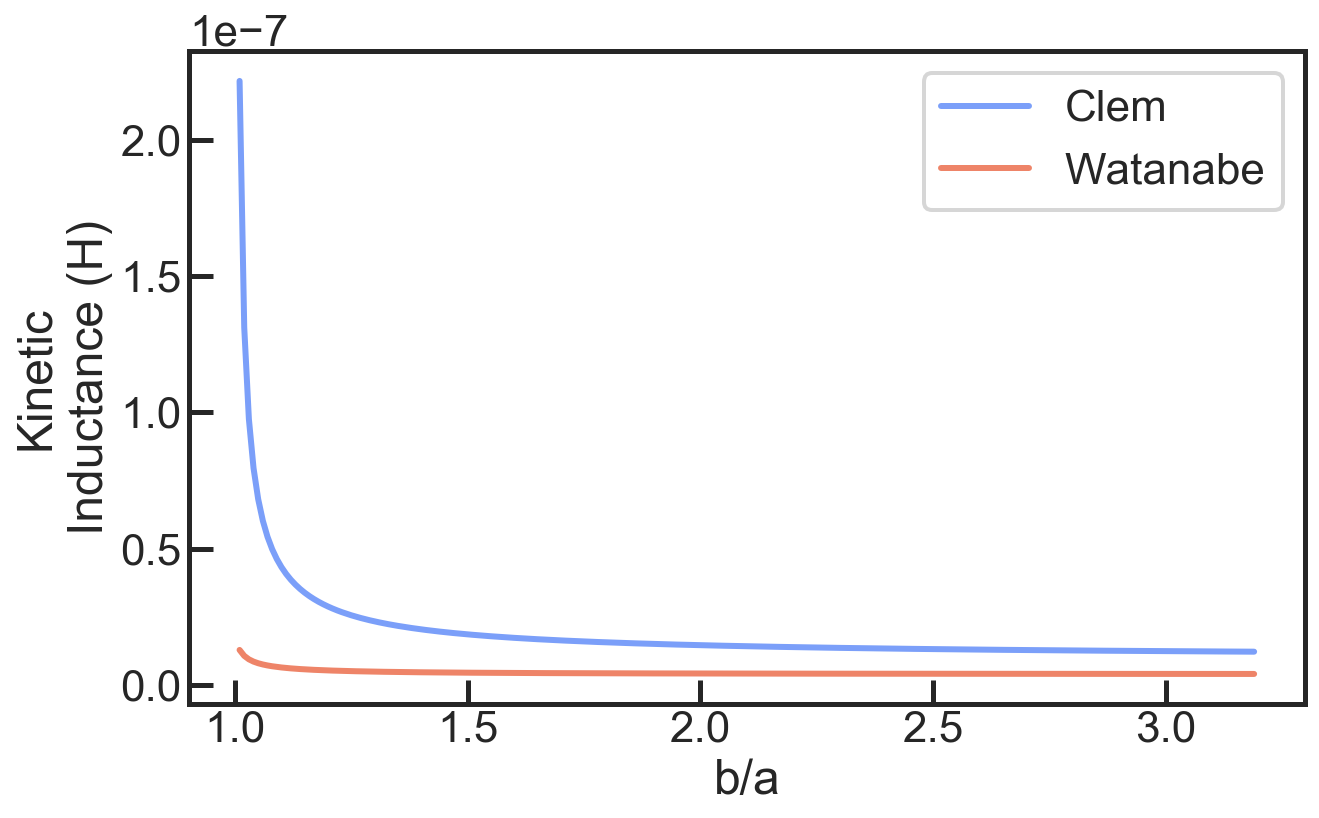

In [4]:
plt.figure(figsize=(10,6))
plt.plot(ind.b/ind.a,Lki_clem1,label='Clem')
plt.plot(ind.b/ind.a,Lki_watanabe,color=sns.color_palette()[3],label='Watanabe')
plt.xlabel('b/a')
plt.ylabel('Kinetic\nInductance (H)')
plt.legend()
plt.savefig('figs/Lki_from_section_IIB.pdf',bbox_inches=None)
plt.show()